# **Chapter 3**
This notebook walkthrough the cleaning and exploring process of our arabic tweets dataset

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from IPython.display import display

import utils


FONT_PATH = os.environ.get("FONT_PATH", "/Library/Fonts/Times New Roman.ttf")
path = './labeld_dataset/'

In [2]:
# sys.path.insert(0, path)

In [3]:
bolivard = pd.read_csv(path+'bolivard.csv', header=0)
winter = pd.read_csv(path+'winter_wounder_land.csv', header=None)
shm = pd.read_csv(path+'labeled shm3.csv', header=0)

In [4]:
display(shm.loc[:, shm.columns != 'user-name'].head(n=3))
display(bolivard.head(n=3))
display(winter.head(n=3))

Unnamed: 0                 date  label  \
0         31  2019-11-06 15:43:30    2.0   
1         32  2019-11-06 15:43:07    2.0   
2        108  2019-11-06 15:01:00    2.0   

                                               tweet    loca  fv_count  \
0  ÿßÿ®Ÿà ŸÜÿßÿµÿ± ÿ∑ŸÑÿ®ÿ™ŸÉ ...ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ÿ™ŸÉŸàŸÜ ŸÑŸäŸÑÿ© ŸÑŸÉ ŸÉŸÑŸäŸÑÿ© ÿπ...    ÿ¨ÿØÿ©        0.0   
1                   ŸÑŸäŸÑÿ© ÿ≥ŸáŸÖ ÿπŸÑŸâ ÿßŸä ŸÇŸÜÿßŸá ÿπÿ±ÿ∂ŸàŸáÿß ÿßŸÖÿ≥ÿü     NaN       0.0   
2  #ŸÑŸäŸÑÿ©_ÿ≥ŸáŸÖ\nÿßŸÑŸÑŸäŸÑÿ© ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ ÿ¨ŸÖŸäŸÑÿ© .. ÿ®ÿ≥ ÿßŸÑŸÉÿ±ÿßÿ≥Ÿä...  ÿßŸÑÿ±Ÿäÿßÿ∂       0.0   

   rt-count Event name  
0       0.0        SHM  
1       0.0        SHM  
2       0.0        SHM

date  label  \
0  2019-10-19 15:06:03      0   
1  2019-10-19 15:05:17      1   
2  2019-10-19 15:02:51      1   

                                                text              event  
0                #ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ_ÿßŸÑÿ±Ÿäÿßÿ∂ Ÿàÿµÿßÿ± ŸÑŸÑÿπŸàÿßÿ¶ŸÑ ŸÅŸÇÿ∑üòÇüòÇ  carnival_bolivard  
1  @RiyadhSeason ŸàÿØŸÜÿß #ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ_ÿßŸÑÿ±Ÿäÿßÿ∂ ŸäŸÉŸàŸÜ ŸÖÿ™Ÿàÿßÿ¨...  carnival_bolivard  
2  ÿ£ÿ∫ŸÑÿ®ŸÜÿß ÿ™ÿ∂ÿßŸäŸÇ ŸÖŸÜ ÿ≤ÿ≠ŸÖÿ© #ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ_ÿßŸÑÿ±Ÿäÿßÿ∂ ŸàÿßŸÑŸÖŸÜÿßÿ∏ÿ±...  carnival_bolivard

0                                                  1    2
0  2019-10-26 20:14:04  ÿßŸÑŸÑÿπÿ®ÿ© Ÿáÿ∞Ÿä ŸÅŸä  #ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ÿßŸÑŸäŸàŸÖ\n\nÿßÿÆŸäÿ±ÿß ÿ¨...  NaN
1  2019-10-26 20:13:28  ÿßÿ¨ŸÖŸÑ ŸÖŸÉÿßŸÜ ÿ±ÿ≠ÿ™ ŸÑŸá ŸÑŸÑÿ≠ŸäŸÜ ŸÅŸä ŸÖŸàÿ≥ŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂ ŸàŸÜÿ™ÿ± ŸàŸÜÿØ...    1
2  2019-10-26 20:12:23  ŸÖÿ™Ÿâ ŸäÿπŸÇŸÑŸàŸÜ ÿ∞ŸàŸàŸÑÿß ÿüÿüÿüüòÇüíî\n\n#ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ #ŸàŸäŸÜÿ™...    2

In [5]:
winter.columns = ['date', 'text', 'label']
print(shm.columns)

Index(['Unnamed: 0', 'date', 'label', 'tweet', 'user-name', 'loca', 'fv_count',
       'rt-count', 'Event name'],
      dtype='object')


In [6]:

shm.drop('Unnamed: 0', inplace=True, axis=1)
shm.rename(columns={'tweet': 'text'}, inplace=True)


In [7]:
print(shm.columns)
print(winter.columns)

Index(['date', 'label', 'text', 'user-name', 'loca', 'fv_count', 'rt-count',
       'Event name'],
      dtype='object')
Index(['date', 'text', 'label'], dtype='object')


In [8]:
winter['event'] = 'winter_wonder_land'
shm['event'] = 'shm'
shm.drop('Event name', inplace=True, axis=1)

In [9]:
print(f'Shm event labeld tweets {shm.label.notna().sum()}\nwinter event labeld tweets {winter.label.notna().sum()}\nbolivard event labeld tweets {bolivard.label.notna().sum()}')

Shm event labeld tweets 1548
winter event labeld tweets 1480
bolivard event labeld tweets 2001


In [10]:
shm = shm[shm.label.notna()]

winter = winter[winter.label.notna()]



In [11]:
print(shm.label.value_counts())

print('\n', winter.label.value_counts())

print('\n',bolivard.label.value_counts())

1.0    1387
0.0     128
2.0      33
Name: label, dtype: int64

 1    703
2    490
0    285
       2
Name: label, dtype: int64

 1    1240
0     533
2     228
Name: label, dtype: int64


In [12]:
winter = winter[winter.label != ' ']

In [13]:
shm.label = shm.label.astype('int64')

In [14]:
print(shm.shape)
print(winter.shape)
print(bolivard.shape)

(1548, 8)
(1478, 4)
(2001, 4)


In [15]:
merged = pd.concat([winter, bolivard, shm])

/Users/yasir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
display(merged.head(n=15))
print(merged.shape)

date               event  fv_count label loca  rt-count  \
1   2019-10-26 20:13:28  winter_wonder_land       NaN     1  NaN       NaN   
2   2019-10-26 20:12:23  winter_wonder_land       NaN     2  NaN       NaN   
3   2019-10-26 20:09:44  winter_wonder_land       NaN     2  NaN       NaN   
4   2019-10-26 20:08:12  winter_wonder_land       NaN     2  NaN       NaN   
6   2019-10-26 20:05:38  winter_wonder_land       NaN     1  NaN       NaN   
7   2019-10-26 20:04:07  winter_wonder_land       NaN     2  NaN       NaN   
8   2019-10-26 20:03:19  winter_wonder_land       NaN     1  NaN       NaN   
9   2019-10-26 20:00:18  winter_wonder_land       NaN     1  NaN       NaN   
10  2019-10-26 19:48:44  winter_wonder_land       NaN     1  NaN       NaN   
11  2019-10-26 19:48:20  winter_wonder_land       NaN     0  NaN       NaN   
15  2019-10-26 19:36:37  winter_wonder_land       NaN     2  NaN       NaN   
16  2019-10-26 19:34:22  winter_wonder_land       NaN     1  NaN       NaN   
17  2019-10-26 19:34:02  winter_wonder_land       NaN     2  NaN       NaN   
18  2019-10-26 19:32:12  winter_wonder_land       NaN     2  NaN       NaN   
19  2019-10-26 19:31:34  winter_wonder_land       NaN     2  NaN       NaN   

                                                 text user-name  
1   ÿßÿ¨ŸÖŸÑ ŸÖŸÉÿßŸÜ ÿ±ÿ≠ÿ™ ŸÑŸá ŸÑŸÑÿ≠ŸäŸÜ ŸÅŸä ŸÖŸàÿ≥ŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂ ŸàŸÜÿ™ÿ± ŸàŸÜÿØ...       NaN  
2   ŸÖÿ™Ÿâ ŸäÿπŸÇŸÑŸàŸÜ ÿ∞ŸàŸàŸÑÿß ÿüÿüÿüüòÇüíî\n\n#ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ #ŸàŸäŸÜÿ™...       NaN  
3   ÿ≠ÿØ Ÿäÿπÿ±ŸÅ ÿ≥ÿπÿ± ÿßŸÑÿßŸÑÿπÿßÿ® ŸÅŸä ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ± ŸÑÿßŸÜÿØ ÿü!!\n #ŸÖ...       NaN  
4       @KAldeehani @MQA707 ŸÑÿß ÿµÿ≠ ÿßÿ≥ŸÖŸáÿß ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ       NaN  
6   @Turki_alalshikh ÿßŸÑŸäŸàŸÖ ÿ≤ÿ±ÿ™ #ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ŸÖÿπ ÿß...       NaN  
7   ÿ™ÿØÿ±ŸäŸÜ ŸÑŸäŸá ÿßŸÑŸÖÿ∑ÿ± Ÿäÿ¥ÿ™ÿßŸÇ ŸÑŸÉ ŸäÿßŸÑÿ±Ÿäÿßÿ∂\nŸÖŸÜ ÿ®ŸäŸÜ ŸÉŸÑ ÿßŸÑ...       NaN  
8   #ŸÖŸàÿ≥ŸÖ_ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÅŸäŸá ŸÖÿ∑ÿßÿπŸÖ ÿ£ŸÑÿπÿßÿ® ŸÜÿßÿ±Ÿäÿ© ÿßŸÑŸÜÿßŸÅŸàÿ±ÿ©ÿå ÿß...       NaN  
9   ÿ≥ŸäŸÜŸÖÿß ÿπŸÑŸâ ÿßŸÑÿ£ÿ¨Ÿàÿßÿ° ÿßŸÑŸÖŸÅÿ™Ÿàÿ≠ÿ© ŸàŸäÿßÿ≥ŸÑÿßŸÖ ÿ≥ŸÑŸÖüåÉ \nŸÖŸÜ ŸÇ...       NaN  
10  ŸÜÿµŸäÿ≠ÿ™Ÿä ŸÑŸá ŸÑÿß ÿ™ÿ¥ŸäŸÑŸà ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ÿÆŸÑŸà ÿπŸÜÿØŸÜÿß Ÿàÿ≠ÿØ...       NaN  
11  ŸÖÿßÿ∑ŸÑÿ®ŸÜÿß ÿ¥Ÿä ŸÖÿ≥ÿ™ÿ≠ŸäŸÑ ŸàŸÑÿß ÿ¥Ÿä ÿ®ÿßÿ∞ÿÆ ŸÖÿ´ŸÑ #ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿß...       NaN  
15  @AoiBrh ŸÖÿßŸÑŸáÿß ÿØÿÆŸÑ ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ !!! ÿ∞Ÿä ŸÖŸÜ ÿ∂ŸÖŸÜ ...       NaN  
16  #ŸÖŸàÿ≥ŸÖ_ÿßŸÑÿ±Ÿäÿßÿ∂ \n#ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ \n\nŸÖŸÜ ÿ£ÿ≠ŸÑŸâ ÿßŸÑÿ£Ÿä...       NaN  
17  ÿ¨ÿßŸÜÿ® ŸÖŸÜ ÿ™ÿ∫ÿ∑Ÿäÿ© #ÿµŸáŸäŸÑ ŸÑŸÅÿπÿßŸÑŸäÿßÿ™ #ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ÿ®ÿß...       NaN  
18  ÿßŸÑÿÆÿ∑ÿ© ÿ™ŸÉÿ≥Ÿäÿ± ÿ¥ÿ®ŸàŸÉ ! ŸäÿØÿÆŸÑŸàŸÜ ÿ∫ÿµÿ® ÿü\n#ŸÖŸàÿ≥ŸÖ_ÿßŸÑÿ±Ÿäÿßÿ∂ ...       NaN  
19  #ŸàŸÜÿ™ÿ±_ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ\nÿπŸÑŸÖŸàŸÜŸä ÿ®ÿßŸÑŸÜÿ≥ÿ®Ÿá ŸÑŸÑÿßŸÑÿπÿßÿ® ŸÉŸÑ ŸÑÿπÿ®Ÿá...       NaN

(5027, 8)


In [17]:
merged.label  = pd.to_numeric(merged.label)

In [18]:
merged.label.value_counts()

1    3330
0     946
2     751
Name: label, dtype: int64

In [19]:
merged.label = merged['label'].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

In [20]:
frequent_words = utils.frequent_words(merged.text, topk=25)
frequent_words

ÿßŸÑÿ±Ÿäÿßÿ∂        2847
ÿ≥ŸáŸÖ           1646
ŸÖŸàÿ≥ŸÖ          1634
ŸàŸÜÿ™ÿ±          1407
ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ      1400
ŸÑŸäŸÑÿ©          1378
ŸÖÿ≥Ÿäÿ±Ÿá          946
ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ       657
ŸÑŸäŸÑŸá           398
ÿßŸÑŸäŸàŸÖ          239
ŸÖÿ≥Ÿäÿ±ÿ©          206
ÿßÿ±Ÿàÿ≠           164
ÿ±ÿßÿ®ÿ≠           119
ÿßŸÑÿ≤ÿ≠ŸÖŸá         110
ÿßŸÑÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ     103
ÿ¨ŸÖŸäŸÑ           101
ÿ™ÿ±ŸÉŸä           100
ÿµÿßÿ±            100
ÿßŸÑŸÜÿßÿ≥          100
ÿ¥ŸÉÿ±ÿß            99
ÿ≤ÿ≠ŸÖŸá            98
ÿßÿ≠ŸÑŸâ            95
ÿßŸÑÿ™ÿ±ŸÅŸäŸá         95
ÿ¥ŸÉÿ±ÿßŸã           93
ÿßÿ¨ŸÖŸÑ            85
dtype: int64

In [21]:
pos_frequ_words = utils.frequent_words(merged[merged.label == 'Positive'].text, topk=25)
pos_frequ_words

ÿßŸÑÿ±Ÿäÿßÿ∂       1897
ÿ≥ŸáŸÖ          1476
ŸÑŸäŸÑÿ©         1276
ŸÖŸàÿ≥ŸÖ         1115
ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ      689
ŸàŸÜÿ™ÿ±          689
ŸÖÿ≥Ÿäÿ±Ÿá         638
ŸÑŸäŸÑŸá          339
ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ      333
ÿßŸÑŸäŸàŸÖ         172
ŸÖÿ≥Ÿäÿ±ÿ©         169
ÿ±ÿßÿ®ÿ≠          116
ÿßÿ±Ÿàÿ≠          105
ÿ¥ŸÉÿ±ÿß           94
ÿßÿ≠ŸÑŸâ           92
ÿ¨ŸÖŸäŸÑ           90
ÿ¥ŸÉÿ±ÿßŸã          89
ÿµÿßÿ±            86
ÿßÿ¨ŸÖŸÑ           82
ÿπÿ®ÿØÿßŸÑŸÖÿ¨ŸäÿØ      80
ÿµŸÇÿ±            74
ÿßŸÑÿ™ÿ±ŸÅŸäŸá        73
ÿ™ÿ±ŸÉŸä           73
ÿ¨ÿ®ÿßÿ±           72
ŸÖÿßÿ¨ÿØ           68
dtype: int64

In [22]:
neg_frequ_words = utils.frequent_words(merged[merged.label == 'Negative'].text, topk=25)
neg_frequ_words

ÿßŸÑÿ±Ÿäÿßÿ∂        585
ŸÖŸàÿ≥ŸÖ          381
ŸÖÿ≥Ÿäÿ±Ÿá         266
ŸàŸÜÿ™ÿ±          257
ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ      255
ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ      157
ÿ≥ŸáŸÖ           131
ŸÑŸäŸÑÿ©           77
ÿ≤ÿ≠ŸÖŸá           61
ÿßŸÑÿ≤ÿ≠ŸÖŸá         52
ÿ™ŸÜÿ∏ŸäŸÖ          48
ÿ≤ÿ≠ŸÖÿ©           47
ŸÑŸäŸÑŸá           45
ÿßŸÑÿ≤ÿ≠ŸÖÿ©         36
ÿßŸÑŸÜÿßÿ≥          32
ÿßŸÑŸäŸàŸÖ          31
ŸÖÿ≥Ÿäÿ±ÿ©          30
ÿßÿ±Ÿàÿ≠           26
ÿßŸÑÿ™ŸÜÿ∏ŸäŸÖ        24
ÿßŸÑÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ     21
ÿßŸÑÿ≠ŸäŸÜ          20
ÿßŸÑŸàŸÉŸäŸÑ         19
ŸÖŸÉÿßŸÜ           19
Ÿäÿßÿ±ÿ®           19
ŸàŸÜÿπŸÖ           19
dtype: int64

In [23]:
neu_frequ_words = utils.frequent_words(merged[merged.label == 'Neutral'].text, topk=25)
neu_frequ_words

ŸàŸÜÿ™ÿ±          461
ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ      456
ÿßŸÑÿ±Ÿäÿßÿ∂        365
ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ      167
ŸÖŸàÿ≥ŸÖ          138
ŸÖÿ≥Ÿäÿ±Ÿá          42
ÿ≥ŸáŸÖ            39
ÿßŸÑŸäŸàŸÖ          36
ÿßŸÑÿ≤ÿ≠ŸÖŸá         35
ÿßÿ±Ÿàÿ≠           33
ÿ≤ÿ≠ŸÖŸá           30
ÿ™ÿ∞ÿßŸÉÿ±          26
ÿßŸÑŸÜÿßÿ≥          25
ŸÑŸäŸÑÿ©           25
ÿßŸÑÿ≤ÿ≠ŸÖÿ©         24
ÿßŸÑÿ≠ŸäŸÜ          20
ÿ≤ÿ≠ŸÖÿ©           19
ÿπŸÑŸä            18
ÿ±ÿßÿ≠            17
ÿßŸÑÿßŸÑÿπÿßÿ®        17
ÿ≥ÿ®ÿßŸÇ           16
ÿßŸÑÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ     15
ÿßŸÑŸáŸÑÿßŸÑ         15
ŸÑŸäŸÑŸá           14
ŸàŸäŸÜ            13
dtype: int64

In [24]:
combind = ' '.join(frequent_words.index)

In [25]:
data = arabic_reshaper.reshape(combind)
data = get_display(data)
data = data.split()
data.reverse()
print(data)

['Ô∫ΩÔ∫éÔª≥Ô∫ÆÔªüÔ∫ç', 'Ôª¢Ôª¨Ô∫≥', 'Ôª¢Ô∫≥ÔªÆÔª£', 'Ô∫ÆÔ∫òÔªßÔª≠', 'Ô∫™ÔªßÔªªÔ∫≠Ô∫™ÔªßÔª≠', 'Ô∫îÔª†Ôª¥Ôªü', 'Ôª©Ô∫ÆÔª¥Ô∫¥Ôª£', 'Ô∫©Ô∫≠Ô∫éÔªîÔª¥ÔªüÔªÆÔ∫ë', 'Ôª™Ôª†Ôª¥Ôªü', 'Ôª°ÔªÆÔª¥ÔªüÔ∫ç', 'Ô∫ìÔ∫ÆÔª¥Ô∫¥Ôª£', 'Ô∫°Ôª≠Ô∫≠Ô∫ç', 'Ô∫¢Ô∫ëÔ∫çÔ∫≠', 'Ôª™Ôª§Ô∫£Ô∫∞ÔªüÔ∫ç', 'Ô∫©Ô∫≠Ô∫éÔªîÔª¥ÔªüÔªÆÔ∫íÔªüÔ∫ç', 'ÔªûÔª¥Ôª§Ô∫ü', 'Ôª≤ÔªõÔ∫ÆÔ∫ó', 'Ô∫≠Ô∫éÔ∫ª', 'Ô∫±Ô∫éÔª®ÔªüÔ∫ç', 'Ô∫çÔ∫ÆÔªúÔ∫∑', 'Ôª™Ôª§Ô∫£Ô∫Ø', 'Ôª∞Ôª†Ô∫£Ô∫ç', 'Ôª™Ôª¥ÔªìÔ∫ÆÔ∫òÔªüÔ∫ç', 'Ô∫çÔ∫ÆÔªúÔ∫∑', 'ÔªûÔª§Ô∫üÔ∫ç']


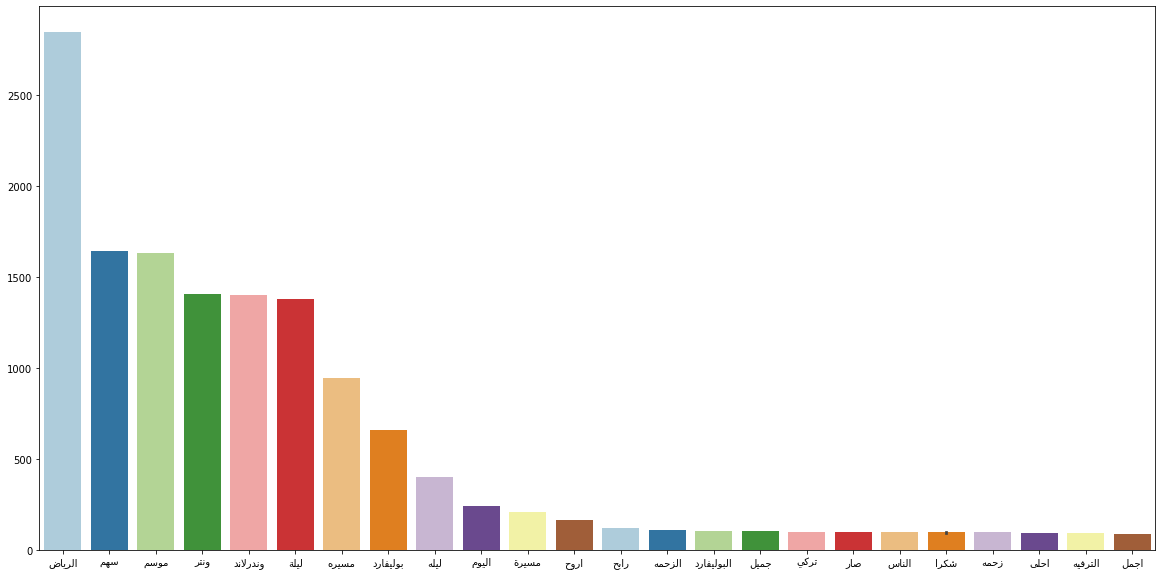

In [26]:
fig , ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data, frequent_words.values, palette="Paired")
plt.show()

In [27]:
pos_emojies = utils.view_emojie(merged[merged.label == 'Positive'].text)
neg_emojies = utils.view_emojie(merged[merged.label == 'Negative'].text)

In [28]:
print(pos_emojies)
print(neg_emojies)

0         
1         
2         
3       üåÉüòè
4         
        ..
3325      
3326      
3327     üòç
3328     üíî
3329     üíô
Length: 3330, dtype: object
0        
1        
2        
3        
4        
       ..
941      
942      
943      
944    üéºüñ§
945      
Length: 946, dtype: object


In [29]:
pos_emojies = pos_emojies.replace(r'^\s*$', np.nan, regex=True) # replace empty space with nan .. 
pos_emojies.dropna(inplace=True)

neg_emojies = neg_emojies.replace(r'^\s*$', np.nan, regex=True) 
neg_emojies.dropna(inplace=True)

In [30]:
display(pos_emojies.value_counts())

display(neg_emojies.value_counts())

‚ù§        117
üòç         93
üíî         76
üíô         66
‚ô•         47
        ... 
üá∏üá¶‚ù§üòç       1
üí´üåö‚ô•‚ô•       1
üôèüèª‚ù§        1
üò≠üñ§üñ§üñ§üñ§      1
üòò‚ù§         1
Length: 963, dtype: int64

üíî      17
üòÇ      14
üôÇ      10
üò∑       6
üò©       6
       ..
‚úãüèªüò°     1
ü•¥üò©ü§Æ     1
üò§üôÇ      1
üò¨       1
üò¨üò¨      1
Length: 148, dtype: int64

In [31]:
pos_arr = []
neg_arr = []
for pos_row, neg_row in zip(pos_emojies, neg_emojies):
    for p_item, n_item  in zip(pos_row, neg_row):
        pos_arr.append(p_item)
        neg_arr.append(n_item)
     
pos_emojies = pd.Series(pos_arr)  
neg_emojies = pd.Series(neg_arr)      

In [32]:
display(pos_emojies.value_counts()[:10])
# display(pos_emojies.value_counts()[-7:])
pos_emojies.value_counts()[:10].to_csv('postive_emojies.csv', index=True)

üòç    66
üò≠    43
‚ù§    29
üíî    24
üòÇ    13
ü•∫    12
‚ô•    10
üíô     9
üî•     8
üèª     6
dtype: int64

/Users/yasir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
display(neg_emojies.value_counts()[:10])
# display(neg_emojies.value_counts()[-7:])
neg_emojies.value_counts()[:10].to_csv('negative_emojies.csv', index=True)

üíî    50
üòÇ    30
üò≠    23
üôÇ    20
üèª    12
üò°    10
üò∑    10
ü§¢     9
‚ù§     8
üò©     8
dtype: int64

/Users/yasir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
cleaned = utils.get_arabic_words(merged.text, handle_emojies='remove', remove_repeated_char=True)
display(cleaned.head(n=15))

0     ÿßÿ¨ŸÖŸÑ ŸÖŸÉÿßŸÜ ÿ±ÿ≠ÿ™ ŸÑÿ≠ŸäŸÜ ŸÖŸàÿ≥ŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂ ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ÿ≠...
1               ŸäÿπŸÇŸÑŸàŸÜ ÿ∞ŸàŸÑÿß ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ŸàŸäŸÜÿ™ÿ±ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ
2     Ÿäÿπÿ±ŸÅ ÿ≥ÿπÿ± ÿßŸÑÿßŸÑÿπÿßÿ® ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ± ŸÑÿßŸÜÿØ ŸÖŸàÿ≥ŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂ ŸàŸÜ...
3                                   ÿßÿ≥ŸÖŸáÿß ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ
4     ÿßŸÑŸäŸàŸÖ ÿ≤ÿ±ÿ™ ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ÿßŸÑÿπÿßÿ¶ŸÑÿ© ÿßÿ≥ÿπÿØ ÿßŸäÿßŸÖŸÜÿß ŸÅÿß...
5     ÿ™ÿØÿ±ŸäŸÜ ÿßŸÑŸÖÿ∑ÿ± Ÿäÿ¥ÿ™ÿßŸÇ ŸäÿßŸÑÿ±Ÿäÿßÿ∂ ÿßŸÑŸÅŸäÿßŸÅŸä ŸàÿßŸÑŸÇÿ±Ÿâ ŸàÿßŸÑŸÖÿØ...
6     ŸÖŸàÿ≥ŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂ ŸÖÿ∑ÿßÿπŸÖ ÿ£ŸÑÿπÿßÿ® ŸÜÿßÿ±Ÿäÿ© ÿßŸÑŸÜÿßŸÅŸàÿ±ÿ© ÿßŸÑÿ±ÿπÿ® ÿ≠...
7     ÿ≥ŸäŸÜŸÖÿß ÿßŸÑÿ£ÿ¨Ÿàÿßÿ° ÿßŸÑŸÖŸÅÿ™Ÿàÿ≠ÿ© ŸàŸäÿßÿ≥ŸÑÿßŸÖ ÿ≥ŸÑŸÖ ŸÇÿØŸÉ ÿßŸÑÿ±Ÿäÿßÿ∂ ...
8     ŸÜÿµŸäÿ≠ÿ™Ÿä ÿ™ÿ¥ŸäŸÑŸà ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ÿÆŸÑŸà Ÿàÿ≠ÿØŸá ŸÜÿµŸäÿ≠Ÿá ŸÑÿ™ÿ±ŸÉ...
9     ŸÖÿßÿ∑ŸÑÿ®ŸÜÿß ŸÖÿ≥ÿ™ÿ≠ŸäŸÑ ÿ®ÿßÿ∞ÿÆ ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ŸÖŸàÿ≥ŸÖ ÿßŸÑÿ±Ÿäÿßÿ∂ ...
10    ŸÖÿßŸÑŸáÿß ÿØÿÆŸÑ ŸàŸÜÿ™ÿ± ŸàŸÜÿØÿ±ŸÑÿßŸÜÿØ ÿßŸÑŸÅÿπÿßŸÑŸäÿßÿ™ ÿßŸÑÿ´ÿß

In [35]:
flagged = utils.repeated_char(merged.text)
flagged = flagged.replace(r'^\s*$', np.nan, regex=True)
flagged[flagged.notna()]

30                ÿ™ŸÅŸàŸàŸàÿ™ŸÉ
46              ÿßÿ®ÿØÿßÿßÿßÿßÿßÿπ
52      ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá
62              ÿßŸÜÿ¨ÿßÿ≤ÿ≤ÿ≤ÿ≤ÿ≤
91            ŸàŸÉŸàŸàŸàŸàŸàŸàŸàÿ®Ÿá
              ...        
4973             ÿßŸàŸàŸàŸàŸàŸÅÿ±
4977               ÿπŸäÿ®ÿ®ÿ®ÿ®
4978               ÿ¨ÿØÿØÿØÿØÿß
5003       ÿÆŸÑÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿßÿµ
5022          ŸÖÿ≥ÿ™ÿ≠ŸäŸäŸäŸäŸäŸäŸÑ
Length: 671, dtype: object

In [36]:
# combind = ' '.join(cleaned)

In [37]:
# data = arabic_reshaper.reshape(combind)
# data = get_display(data)

In [38]:
# wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
#                   mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

In [39]:
# wordcloud.to_file('word_cloud_black.png')

In [40]:
# plt.figure(figsize = (25, 25)) 
# plt.imshow(wordcloud, interpolation="bilinear") 
# plt.axis("off") 
# plt.tight_layout() 
# plt.show()

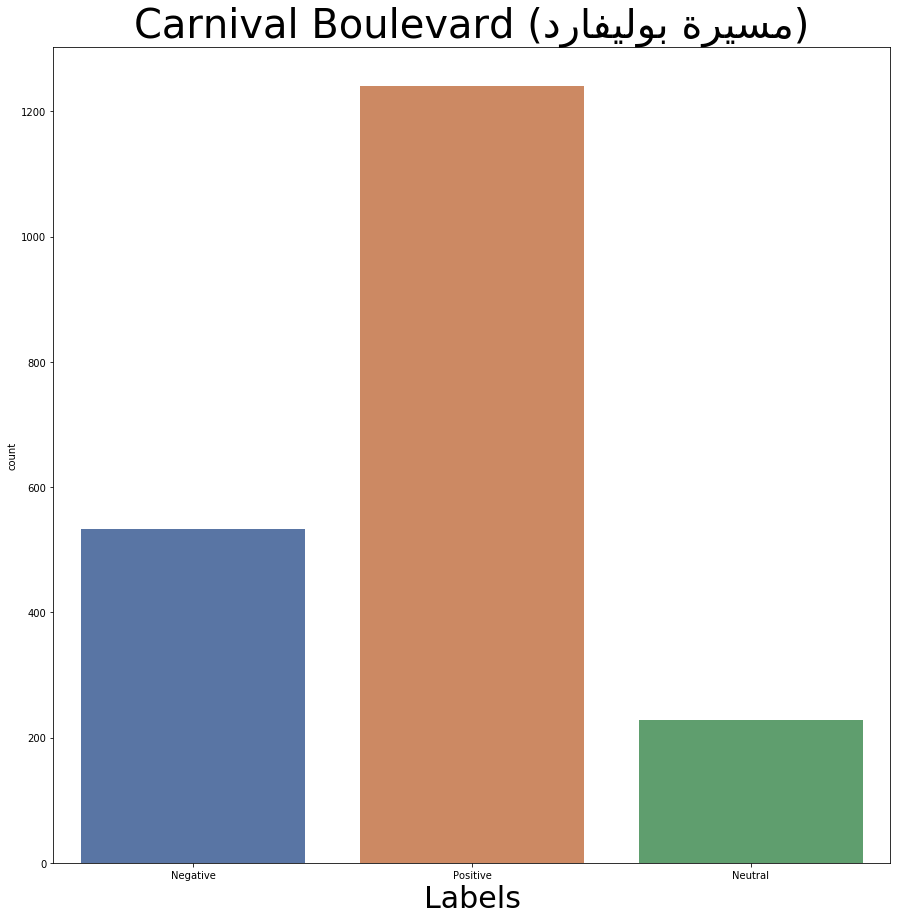

In [41]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.countplot(merged[merged.event=='carnival_bolivard'].label, palette='deep')
event = 'ŸÖÿ≥Ÿäÿ±ÿ© ÿ®ŸàŸÑŸäŸÅÿßÿ±ÿØ'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'Carnival Boulevard ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('carnival_boulevard.png')

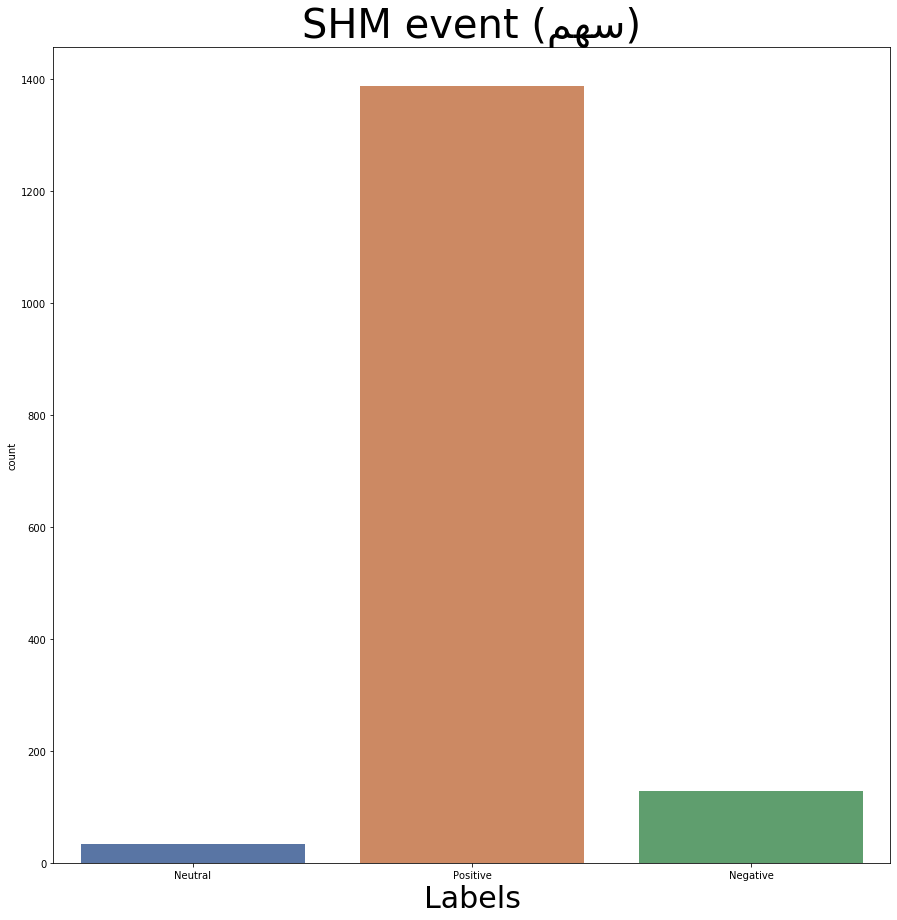

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.countplot(merged[merged.event=='shm'].label, palette='deep')
event = 'ÿ≥ŸáŸÖ'
event = arabic_reshaper.reshape(event)
event = get_display(event)
plt.title(f'SHM event ({event})', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('shm.png')

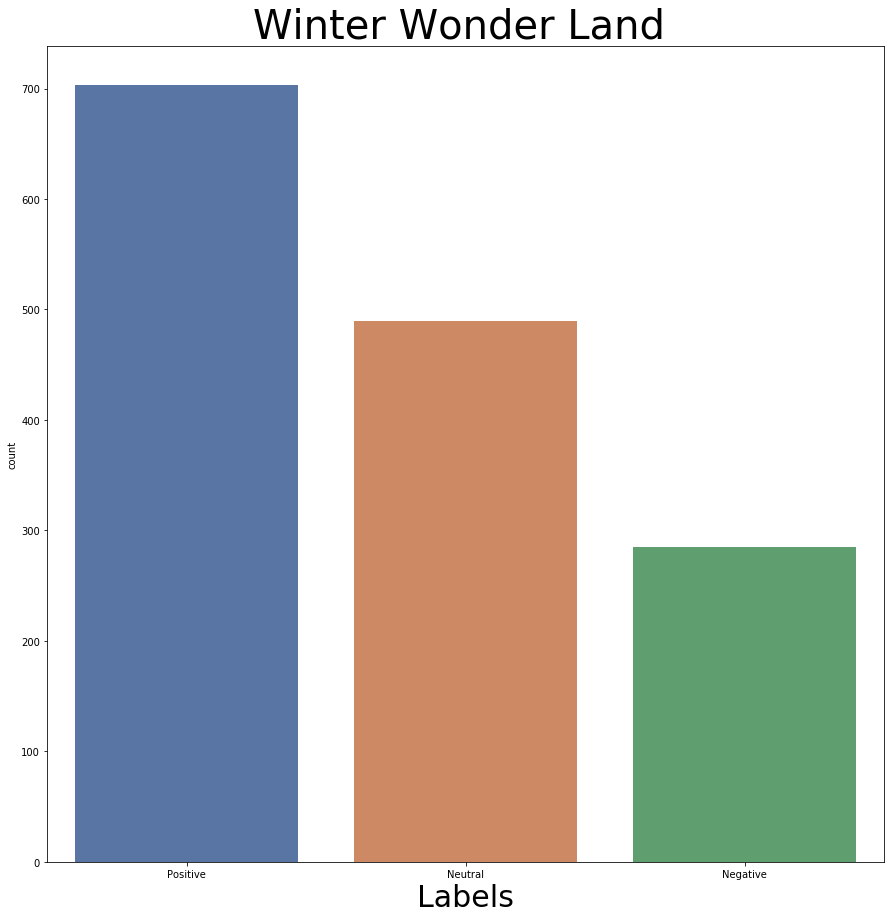

In [43]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.countplot(merged[merged.event=='winter_wonder_land'].label, palette="deep")

plt.title('Winter Wonder Land ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('winter_wonder_land.png')

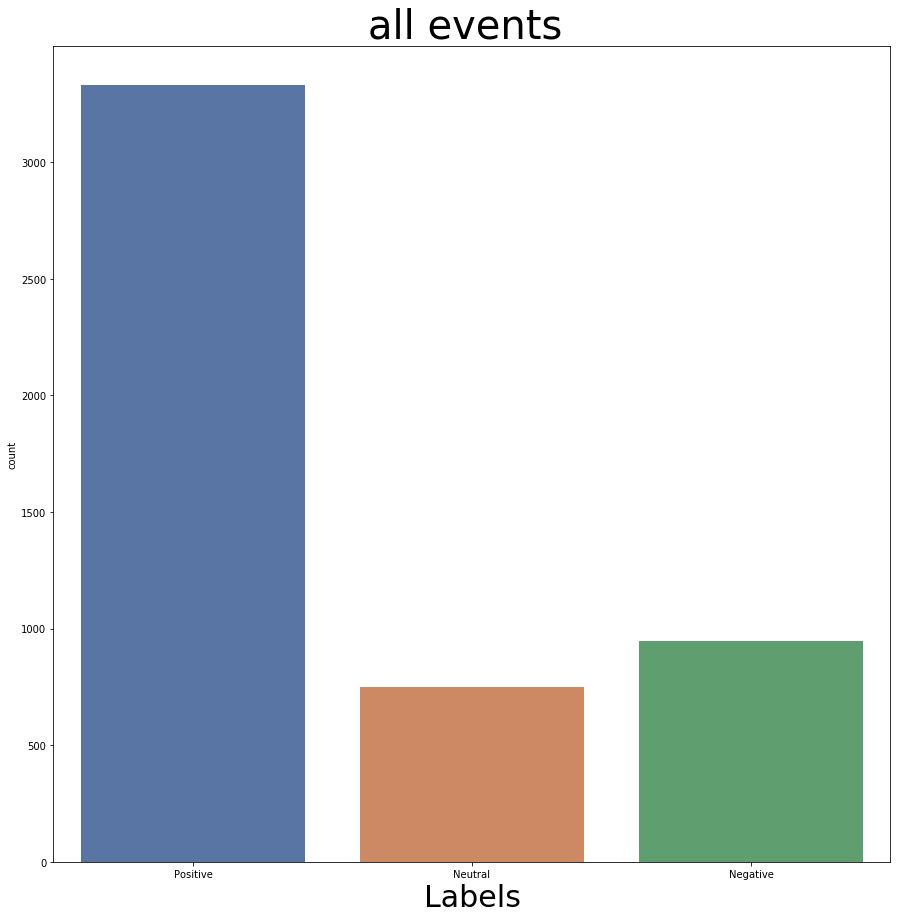

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.countplot(merged.label, palette='deep')
# event = 'ÿ≥ŸáŸÖ'
# event = arabic_reshaper.reshape(event)
# event = get_display(event)
plt.title('all events ', fontsize=40)
plt.xlabel('Labels', fontsize=30)
plt.savefig('events.png')

In [45]:
wonder_land = utils.get_arabic_words(winter.text, handle_emojies='remove', remove_repeated_char=False)
wonder_land = ' '.join(wonder_land)

In [46]:
data = arabic_reshaper.reshape(wonder_land)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

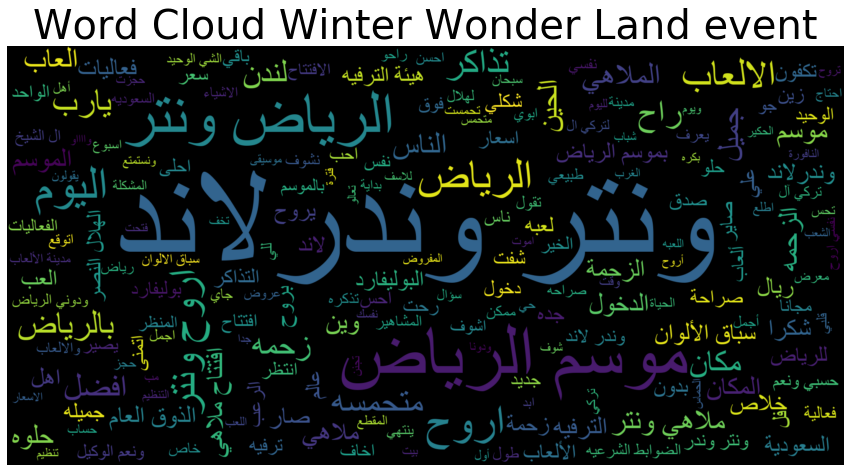

In [47]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title('Word Cloud Winter Wonder Land event', fontsize=40)
plt.axis("off") 
plt.savefig('Word_Cloud_Winter_Wonder_Land.png')
plt.show()


In [48]:
shm_event = utils.get_arabic_words(shm.text, handle_emojies='remove', remove_repeated_char=False)
shm_event = ' '.join(shm_event)

In [49]:
data = arabic_reshaper.reshape(shm_event)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

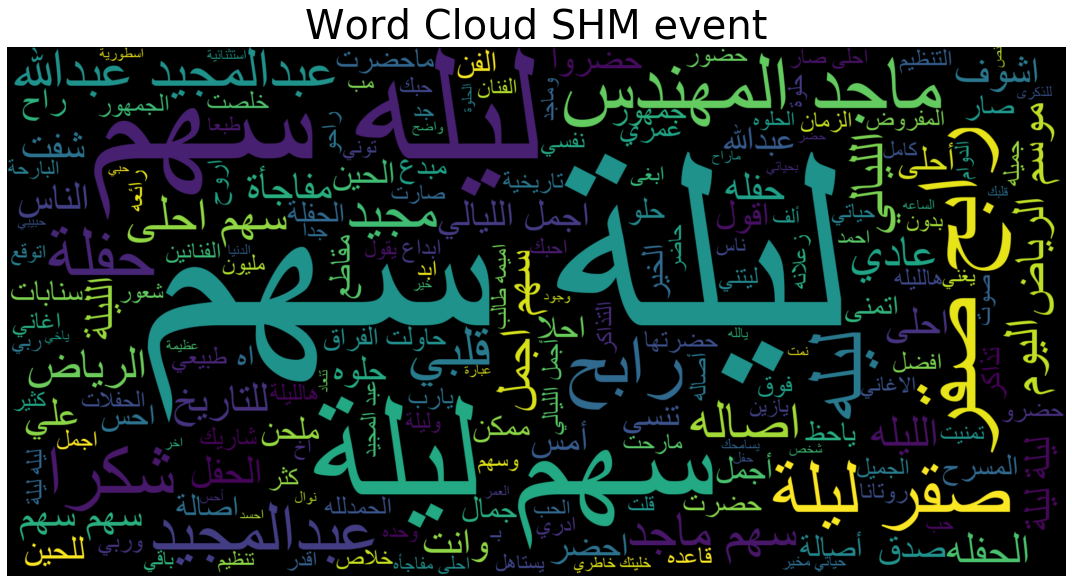

In [50]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.title('Word Cloud SHM event', fontsize=40)
plt.tight_layout() 
plt.savefig('Word_Cloud_SHM_Event.png')
plt.show()

In [51]:
bolivard_event = utils.get_arabic_words(bolivard.text, handle_emojies='remove', remove_repeated_char=False)
bolivard_event = ' '.join(bolivard_event)

In [52]:
data = arabic_reshaper.reshape(bolivard_event)
data = get_display(data)
wordcloud = WordCloud(font_path=FONT_PATH, background_color='black',
                  mode='RGBA', width=2000, height=1000, min_font_size=10).generate(data)

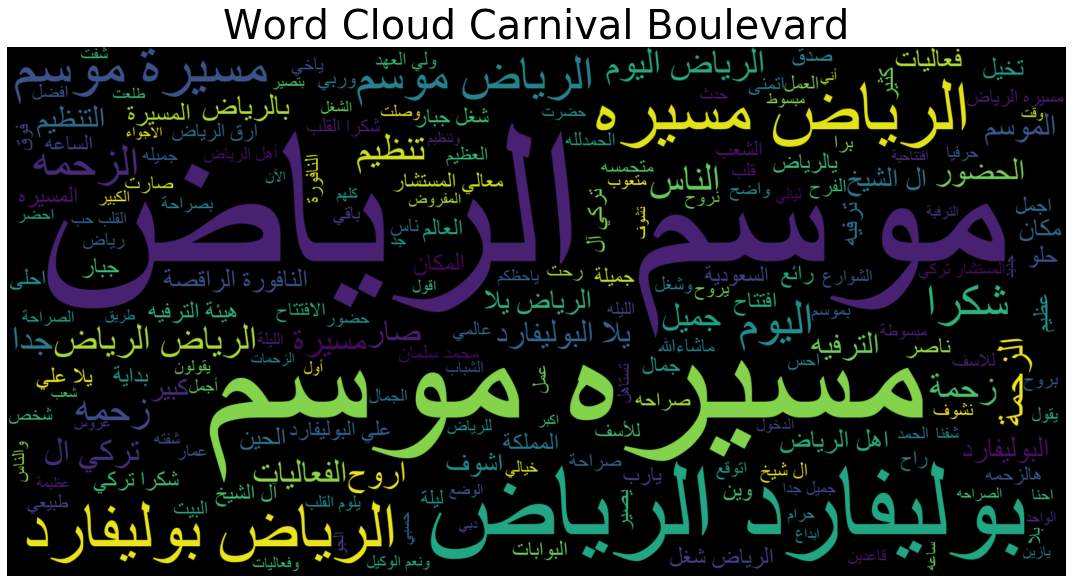

In [53]:
plt.figure(figsize = (15, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.title('Word Cloud Carnival Boulevard', fontsize=40)
plt.tight_layout() 
plt.savefig('Word_Cloud_Carnival_Boulevard.png')
plt.show()